# Getting Started with Exploratory Data Analysis

3 important Python packages
1. **NumPy** for efficient computation on arrays
2. **Pandas** for data analysis
3. **Matplotlib** for plotting in the notebook

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Pandas

Python module for manipulating tabular data

## `pandas`

- Provides python a `DataFrame`
    - Table data structure
    - Can be easily manipulated similar to lists and arrays
- Structured manipulation tools
- Built on top of `numpy`
- Huge growth from 2011-2012
- Very **efficient**
- Great for *medium* data

Resources

- [pandas.pydata.org](http://pandas.pydata.org/)
- [Python for Data Analysis](http://www.amazon.com/Python-Data-Analysis-Wrangling-IPython/dp/1449319793) by Wes McKinney
- [Data Wrangling Kung Fu with Pandas](vimeo.com/63295598) by Wes McKinney
- [Cheat sheet](https://s3.amazonaws.com/quandl-static-content/Documents/Quandl+-+Pandas,+SciPy,+NumPy+Cheat+Sheet.pdf) by Quandl

### Why `pandas`?

> 80% of the effort in data analysis is spent cleaning data. [Hadley Wickham](http://vita.had.co.nz/papers/tidy-data.pdf)

Efficency

- Different views of data
- [Tidy data](http://vita.had.co.nz/papers/tidy-data.pdf) by Hadley Wickham

Raw data is often in the wrong format

- How often to you download an array ready for array-oriented computing?
- e.g. `scikit-learn` interface

Storage may be best in a different format

- Sparse representations
- Upload to database




## Simple example using  *seal* oberservational data

Data from: 

* Baker L, Flemming JEM, Jonsen ID, Lidgard DC, Iverson SJ, Bowen WD (2015) A novel approach to quantifying the spatiotemporal behavior of instrumented grey seals used to sample the environment. Movement Ecology 3(1):20. doi:10.1186/s40462-015-0047-4

* Lidgard DC, Bowen WD, Iverson SJ (2015) Data from: A novel approach to quantifying the spatiotemporal behavior of instrumented grey seals used to sample the environment. Movebank Data Repository. doi:10.5441/001/1.910p0c20

### Reading a CSV file as text

* Data is provided as a CSV file
* You can just read the file in line by line
* This will create a ```list``` of the lines in the file

In [26]:
f = open("Grey seals (Halichoerus grypus) at Sable Island (data from Baker et al. 2015).csv", 'r')
lines = f.readlines()
lines[:10]

['event-id,visible,timestamp,location-long,location-lat,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name\r\n',
 '677436629,true,2011-06-15 17:35:18.000,-59.97949982,43.92495728,,"gps","Halichoerus grypus","106705","E 87","Grey seals (Halichoerus grypus) at Sable Island (data from Baker et al. 2015)"\r\n',
 '677436630,true,2011-06-15 17:50:19.000,-59.98273849,43.92548752,,"gps","Halichoerus grypus","106705","E 87","Grey seals (Halichoerus grypus) at Sable Island (data from Baker et al. 2015)"\r\n',
 '677436631,true,2011-06-15 18:05:32.000,-59.98968887,43.92582703,,"gps","Halichoerus grypus","106705","E 87","Grey seals (Halichoerus grypus) at Sable Island (data from Baker et al. 2015)"\r\n',
 '677436632,true,2011-06-15 18:21:27.000,-59.99033737,43.92613602,,"gps","Halichoerus grypus","106705","E 87","Grey seals (Halichoerus grypus) at Sable Island (data from Baker et al. 2015)"\r\n',
 '677436633,true,2011-06-1

### Creating a `DataFrame`

```
df = pd.read_csv(filename)
print df
```

**Why store it this way?**

- Similar to a table
- powerfull way to interact with the data

### Converting the timestamp Column

NumPy datetime64 dtype


In [27]:
?pd.read_csv

In [28]:
df = pd.read_csv("Grey seals (Halichoerus grypus) at Sable Island (data from Baker et al. 2015).csv", 
                 parse_dates=[2])
df.head(3)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,event-id,visible,timestamp,location-long,location-lat,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,677436629,True,2011-06-15 17:35:18,-59.979500,43.924957,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...
1,677436630,True,2011-06-15 17:50:19,-59.982738,43.925488,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...
2,677436631,True,2011-06-15 18:05:32,-59.989689,43.925827,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...


### What data types are in the data frame?

In [29]:
df.dtypes

event-id                                    int64
visible                                      bool
timestamp                          datetime64[ns]
location-long                             float64
location-lat                              float64
manually-marked-outlier                    object
sensor-type                                object
individual-taxon-canonical-name            object
tag-local-identifier                        int64
individual-local-identifier                object
study-name                                 object
dtype: object

### Overview over the numerical types of the data

In [30]:
df.describe()

,event-id,visible,location-long,location-lat,tag-local-identifier
count,1.244350e+05,124435,124435.000000,124435.000000,124435.000000
mean,6.455033e+08,0.999397,-60.352127,44.453460,106714.273621
std,8.829974e+06,0.0245431,1.124249,0.837039,5.576758
min,6.430037e+08,False,-75.647453,43.408535,106705.000000
25%,6.430355e+08,1,-60.473623,43.928371,106710.000000
50%,6.430666e+08,1,-60.064209,44.198532,106715.000000
75%,6.430977e+08,1,-59.855791,44.689791,106718.000000
max,6.774455e+08,True,-50.937111,59.374504,106724.000000


### Size of the data set

In [31]:
len(df)


124435

### Indexing - very similar to Numpy arrays

* 0 based indexing
* last element not included

In [32]:
df[:10:2]

,event-id,visible,timestamp,location-long,location-lat,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,677436629,True,2011-06-15 17:35:18,-59.979500,43.924957,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...
2,677436631,True,2011-06-15 18:05:32,-59.989689,43.925827,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...
4,677436633,True,2011-06-15 18:36:31,-59.988968,43.925255,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...
6,677436635,True,2011-06-15 19:06:20,-59.985661,43.924999,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...
8,677436637,True,2011-06-15 19:37:18,-59.980728,43.926033,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...


In [33]:
df[-5:]

,event-id,visible,timestamp,location-long,location-lat,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
124430,643119961,True,2012-01-06 03:16:42,-59.756832,43.974522,NaN,gps,Halichoerus grypus,106724,F357,Grey seals (Halichoerus grypus) at Sable Islan...
124431,643119962,True,2012-01-06 03:33:53,-59.757130,43.974274,NaN,gps,Halichoerus grypus,106724,F357,Grey seals (Halichoerus grypus) at Sable Islan...
124432,643119963,True,2012-01-06 03:52:42,-59.758202,43.970879,NaN,gps,Halichoerus grypus,106724,F357,Grey seals (Halichoerus grypus) at Sable Islan...
124433,643119964,True,2012-01-06 04:10:06,-59.761147,43.971104,NaN,gps,Halichoerus grypus,106724,F357,Grey seals (Halichoerus grypus) at Sable Islan...
124434,643119965,True,2012-01-06 04:25:06,-59.762070,43.971161,NaN,gps,Halichoerus grypus,106724,F357,Grey seals (Halichoerus grypus) at Sable Islan...


### Extracting the values of a column

In [34]:
longitude = df['location-long'].values
print(type(longitude))
print len(longitude)
longitude

<type 'numpy.ndarray'>
124435


array([-59.97949982, -59.98273849, -59.98968887, ..., -59.7582016 ,
       -59.76114655, -59.7620697 ])

## Finding how many individuals are tracked

In [35]:
df["individual-local-identifier"].unique()

array(['E 87', 'S0749', 'S0757', 'F104', 'S0753', 'F122', 'K 88', 'K 11',
       'S0751', 'S0758', 'S0756', 'F532', 'F719', 'F367', 'F357'], dtype=object)

## Extracting columns for a new data frame

In [36]:
df.head(2)

,event-id,visible,timestamp,location-long,location-lat,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,677436629,True,2011-06-15 17:35:18,-59.979500,43.924957,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...
1,677436630,True,2011-06-15 17:50:19,-59.982738,43.925488,NaN,gps,Halichoerus grypus,106705,E 87,Grey seals (Halichoerus grypus) at Sable Islan...


In [37]:
sdf = df[["timestamp","location-long","location-lat","individual-local-identifier","event-id"]]
sdf.head(5)

,timestamp,location-long,location-lat,individual-local-identifier,event-id
0,2011-06-15 17:35:18,-59.979500,43.924957,E 87,677436629
1,2011-06-15 17:50:19,-59.982738,43.925488,E 87,677436630
2,2011-06-15 18:05:32,-59.989689,43.925827,E 87,677436631
3,2011-06-15 18:21:27,-59.990337,43.926136,E 87,677436632
4,2011-06-15 18:36:31,-59.988968,43.925255,E 87,677436633


## Using the timestamp as an index

In [38]:
sdf.set_index("timestamp",inplace=True)
sdf.head(5)

,location-long,location-lat,individual-local-identifier,event-id
timestamp,,,,
2011-06-15 17:35:18,-59.979500,43.924957,E 87,677436629
2011-06-15 17:50:19,-59.982738,43.925488,E 87,677436630
2011-06-15 18:05:32,-59.989689,43.925827,E 87,677436631
2011-06-15 18:21:27,-59.990337,43.926136,E 87,677436632
2011-06-15 18:36:31,-59.988968,43.925255,E 87,677436633


## Adding a column

* Want to add a behavior index to the data. 
* Data is in a numpy array

In [39]:
behav = np.random.randn(len(sdf))
sdf.insert(4,'behavior',behav)
sdf.head(5)

,location-long,location-lat,individual-local-identifier,event-id,behavior
timestamp,,,,,
2011-06-15 17:35:18,-59.979500,43.924957,E 87,677436629,0.922880
2011-06-15 17:50:19,-59.982738,43.925488,E 87,677436630,1.367403
2011-06-15 18:05:32,-59.989689,43.925827,E 87,677436631,-0.909319
2011-06-15 18:21:27,-59.990337,43.926136,E 87,677436632,2.177158
2011-06-15 18:36:31,-59.988968,43.925255,E 87,677436633,0.334420


## Renaming columns

* location-long --> longitude
* location-lat --> latitude
* individual-local-identifier -> individual

In [40]:
sdf = sdf.rename(columns={"location-long":"longitude", 
                        "location-lat":"latitude", 
                        "individual-local-identifier": "individual"})
sdf.head(5)

,longitude,latitude,individual,event-id,behavior
timestamp,,,,,
2011-06-15 17:35:18,-59.979500,43.924957,E 87,677436629,0.922880
2011-06-15 17:50:19,-59.982738,43.925488,E 87,677436630,1.367403
2011-06-15 18:05:32,-59.989689,43.925827,E 87,677436631,-0.909319
2011-06-15 18:21:27,-59.990337,43.926136,E 87,677436632,2.177158
2011-06-15 18:36:31,-59.988968,43.925255,E 87,677436633,0.334420


## Writing to a csv file

In [41]:
sdf.to_csv("seal-behav.csv")
!head "seal-behav.csv"

timestamp,longitude,latitude,individual,event-id,behavior
2011-06-15 17:35:18,-59.97949982,43.92495728,E 87,677436629,0.922879888554
2011-06-15 17:50:19,-59.98273849,43.92548752,E 87,677436630,1.36740264558
2011-06-15 18:05:32,-59.98968887,43.92582703,E 87,677436631,-0.909319254048
2011-06-15 18:21:27,-59.99033737,43.92613602,E 87,677436632,2.17715775887
2011-06-15 18:36:31,-59.9889679,43.92525482,E 87,677436633,0.33441980129
2011-06-15 18:51:23,-59.98394394,43.92564011,E 87,677436634,1.06359243464
2011-06-15 19:06:20,-59.98566055,43.92499924,E 87,677436635,-0.316744307689
2011-06-15 19:22:18,-59.987854,43.92406082,E 87,677436636,1.10391793264
2011-06-15 19:37:18,-59.98072815,43.92603302,E 87,677436637,-2.26480880827


# Hierarchical columns

## Reorder the organization of the table

* Index: timestamp
* Columns: the individuals

In [42]:
sd = sdf.pivot(columns='individual') #row, column, values (optional)
sd[:5]

longitude                                          \
individual               E 87 F104 F122 F357 F367 F532 F719 K 11 K 88   
timestamp                                                               
2011-06-11 19:07:27       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2011-06-11 19:24:28       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2011-06-11 19:41:25       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2011-06-11 19:57:39       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2011-06-11 20:14:14       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                ...  behavior                                 \
individual               S0749  ...      F532 F719 K 11 K 88     S0749 S0751   
timestamp                       ...                                            
2011-06-11 19:07:27 -59.961720  ...       NaN  NaN  NaN  NaN -1.013001   NaN   
2011-06-11 19:24:28 -59.960075  ...       NaN  NaN  NaN  NaN  0.517204   NaN   
2011-06-11 19:41:25 -59.956333  ...       NaN  NaN  NaN  NaN  0.344700   NaN   
2011-06-11 19:57:39 -59.957340  ...       NaN  NaN  NaN  NaN  0.238078   NaN   
2011-06-11 20:14:14 -59.965260  ...       NaN  NaN  NaN  NaN  0.783574   NaN   

                                             
individual          S0753 S0756 S0757 S0758  
timestamp                                    
2011-06-11 19:07:27   NaN   NaN   NaN   NaN  
2011-06-11 19:24:28   NaN   NaN   NaN   NaN  
2011-06-11 19:41:25   NaN   NaN   NaN   NaN  
2011-06-11 19:57:39   NaN   NaN   NaN   NaN  
2011-06-11 20:14:14   NaN   NaN   NaN   NaN  

[5 rows x 60 columns]

In [43]:
sd['behavior'][:5]

individual,E 87,F104,F122,F357,F367,F532,F719,K 11,K 88,S0749,S0751,S0753,S0756,S0757,S0758
timestamp,,,,,,,,,,,,,,,
2011-06-11 19:07:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.013001,NaN,NaN,NaN,NaN,NaN
2011-06-11 19:24:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.517204,NaN,NaN,NaN,NaN,NaN
2011-06-11 19:41:25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344700,NaN,NaN,NaN,NaN,NaN
2011-06-11 19:57:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.238078,NaN,NaN,NaN,NaN,NaN
2011-06-11 20:14:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783574,NaN,NaN,NaN,NaN,NaN


## Extracting longitude and latitude for each individual

In [44]:
longLat = sdf[['individual', 'longitude', 'latitude']]
longLat[2::5000]

,individual,longitude,latitude
timestamp,,,
2011-06-15 18:05:32,E 87,-59.989689,43.925827
2011-09-26 15:03:18,E 87,-60.023972,43.928467
2011-07-01 14:24:30,S0749,-59.932743,44.020000
2011-10-17 15:09:15,S0749,-60.100521,44.495800
2011-07-07 01:14:48,S0757,-59.275227,44.682209
2011-12-01 04:11:42,S0757,-60.867977,44.248436
2011-08-20 09:16:11,F104,-60.041412,43.927155
2011-11-16 19:40:27,F104,-60.496716,44.621536
2011-07-20 04:25:05,S0753,-59.538494,44.334286


### Same for the pivoted data

In [45]:
sd[['longitude', 'latitude']][::5000]

longitude                                        \
individual                E 87       F104 F122       F357       F367   
timestamp                                                              
2011-06-11 19:07:27        NaN        NaN  NaN        NaN        NaN   
2011-06-22 03:16:32        NaN        NaN  NaN        NaN        NaN   
2011-06-29 01:15:33        NaN        NaN  NaN        NaN        NaN   
2011-07-06 09:42:34        NaN        NaN  NaN        NaN        NaN   
2011-07-14 09:15:25        NaN        NaN  NaN        NaN        NaN   
2011-07-23 05:14:59        NaN        NaN  NaN        NaN        NaN   
2011-07-30 19:32:57        NaN        NaN  NaN        NaN        NaN   
2011-08-07 22:27:20        NaN        NaN  NaN        NaN        NaN   
2011-08-16 20:55:54        NaN        NaN  NaN        NaN        NaN   
2011-08-24 16:26:58        NaN        NaN  NaN        NaN        NaN   
2011-09-02 06:08:14        NaN        NaN  NaN -59.808678        NaN   
2011-09-10 07:23:12        NaN        NaN  NaN        NaN        NaN   
2011-09-19 15:56:32        NaN        NaN  NaN        NaN -60.160984   
2011-09-27 10:38:24 -60.009354        NaN  NaN        NaN        NaN   
2011-10-06 14:57:37        NaN        NaN  NaN        NaN        NaN   
2011-10-15 00:27:56        NaN        NaN  NaN -60.398602        NaN   
2011-10-22 13:20:00        NaN        NaN  NaN        NaN        NaN   
2011-10-29 02:48:50        NaN        NaN  NaN        NaN        NaN   
2011-11-04 21:24:41        NaN        NaN  NaN        NaN        NaN   
2011-11-13 00:09:13        NaN -60.440189  NaN        NaN        NaN   
2011-11-20 05:29:35        NaN -60.555164  NaN        NaN        NaN   
2011-11-27 13:48:57        NaN        NaN  NaN -60.507767        NaN   
2011-12-05 03:15:54        NaN        NaN  NaN        NaN        NaN   
2011-12-13 01:49:53        NaN        NaN  NaN        NaN        NaN   
2011-12-20 18:14:31        NaN        NaN  NaN        NaN        NaN   

                                                                      \
individual                F532 F719       K 11       K 88      S0749   
timestamp                                                              
2011-06-11 19:07:27        NaN  NaN        NaN        NaN -59.961720   
2011-06-22 03:16:32        NaN  NaN        NaN        NaN        NaN   
2011-06-29 01:15:33        NaN  NaN        NaN        NaN        NaN   
2011-07-06 09:42:34        NaN  NaN        NaN        NaN        NaN   
2011-07-14 09:15:25        NaN  NaN        NaN        NaN -59.762409   
2011-07-23 05:14:59        NaN  NaN        NaN        NaN        NaN   
2011-07-30 19:32:57        NaN  NaN        NaN        NaN        NaN   
2011-08-07 22:27:20 -60.082142  NaN        NaN        NaN        NaN   
2011-08-16 20:55:54        NaN  NaN        NaN -59.684322        NaN   
2011-08-24 16:26:58        NaN  NaN        NaN        NaN -59.989624   
2011-09-02 06:08:14        NaN  NaN        NaN        NaN        NaN   
2011-09-10 07:23:12        NaN  NaN        NaN        NaN        NaN   
2011-09-19 15:56:32        NaN  NaN        NaN        NaN        NaN   
2011-09-27 10:38:24        NaN  NaN        NaN        NaN        NaN   
2011-10-06 14:57:37        NaN  NaN        NaN        NaN        NaN   
2011-10-15 00:27:56        NaN  NaN        NaN        NaN        NaN   
2011-10-22 13:20:00        NaN  NaN        NaN        NaN        NaN   
2011-10-29 02:48:50        NaN  NaN        NaN        NaN        NaN   
2011-11-04 21:24:41        NaN  NaN        NaN -60.117374        NaN   
2011-11-13 00:09:13        NaN  NaN        NaN        NaN        NaN   
2011-11-20 05:29:35        NaN  NaN        NaN        NaN        NaN   
2011-11-27 13:48:57        NaN  NaN        NaN        NaN        NaN   
2011-12-05 03:15:54        NaN  NaN -60.880478        NaN        NaN   
2011-12-13 01:49:53        NaN  NaN        NaN        NaN        NaN   
2011-12-20 18:14:31        NaN  NaN -60.806515        NaN   

### Extracting Data from a Data Frame with a Condition

- Extracting Seal F719 from the table

In [46]:
df[df["individual-local-identifier"] == "F719"][:5]

,event-id,visible,timestamp,location-long,location-lat,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
105100,643100631,True,2011-06-14 19:59:29,-59.826447,43.937832,NaN,gps,Halichoerus grypus,106721,F719,Grey seals (Halichoerus grypus) at Sable Islan...
105101,643100632,True,2011-06-14 20:32:38,-59.829632,43.931831,NaN,gps,Halichoerus grypus,106721,F719,Grey seals (Halichoerus grypus) at Sable Islan...
105102,643100633,True,2011-06-14 20:48:07,-59.813534,43.936577,NaN,gps,Halichoerus grypus,106721,F719,Grey seals (Halichoerus grypus) at Sable Islan...
105103,643100634,True,2011-06-14 21:18:03,-59.812885,43.942875,NaN,gps,Halichoerus grypus,106721,F719,Grey seals (Halichoerus grypus) at Sable Islan...
105104,643100635,True,2011-06-14 21:33:03,-59.808041,43.941067,NaN,gps,Halichoerus grypus,106721,F719,Grey seals (Halichoerus grypus) at Sable Islan...


In [47]:
sd[[('behavior', "F719"), ('latitude', "F104"),('longitude', "F719")]][:5]

,behavior,latitude,longitude
individual,F719,F104,F719
timestamp,,,
2011-06-11 19:07:27,NaN,NaN,NaN
2011-06-11 19:24:28,NaN,NaN,NaN
2011-06-11 19:41:25,NaN,NaN,NaN
2011-06-11 19:57:39,NaN,NaN,NaN
2011-06-11 20:14:14,NaN,NaN,NaN


In [48]:
sd[[('behavior', "F719"), 
    ('latitude', "F719"),
    ('longitude', "F719")]].dropna()[:5]

,behavior,latitude,longitude
individual,F719,F719,F719
timestamp,,,
2011-06-14 19:59:29,1.488462,43.937832,-59.826447
2011-06-14 20:32:38,-0.215203,43.931831,-59.829632
2011-06-14 20:48:07,1.524208,43.936577,-59.813534
2011-06-14 21:18:03,0.820091,43.942875,-59.812885
2011-06-14 21:33:03,0.853780,43.941067,-59.808041


## Simple Plotting

- Plot the datafrom

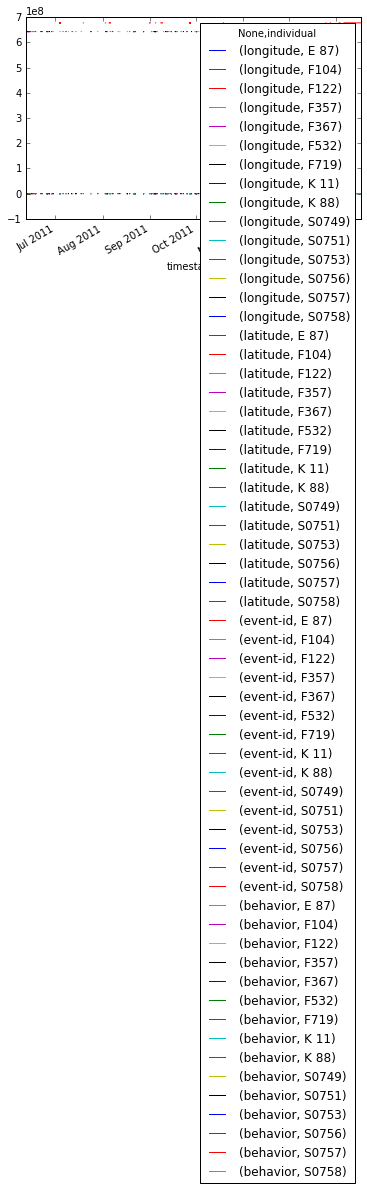

In [49]:
sd.plot()

### Plot the behavior of all seals

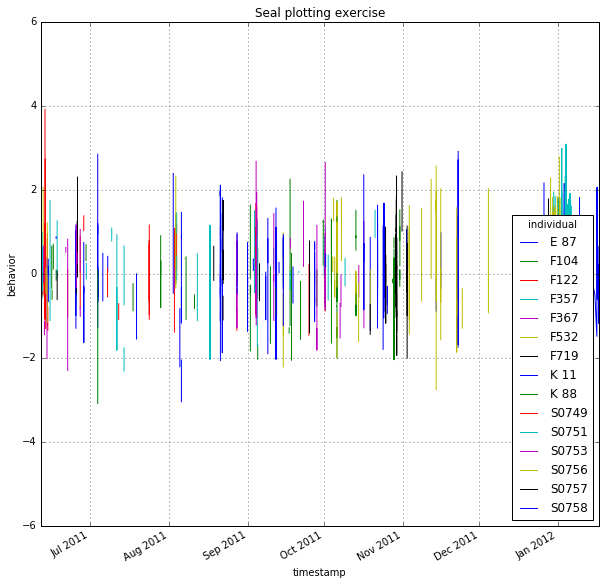

In [50]:
sd['behavior'].plot(figsize=(10, 10))
plt.ylabel('behavior')
plt.title('Seal plotting exercise')
plt.savefig('seal_behavior.png')
plt.grid()
plt.show()

### Plot the behavior of  seal K 11

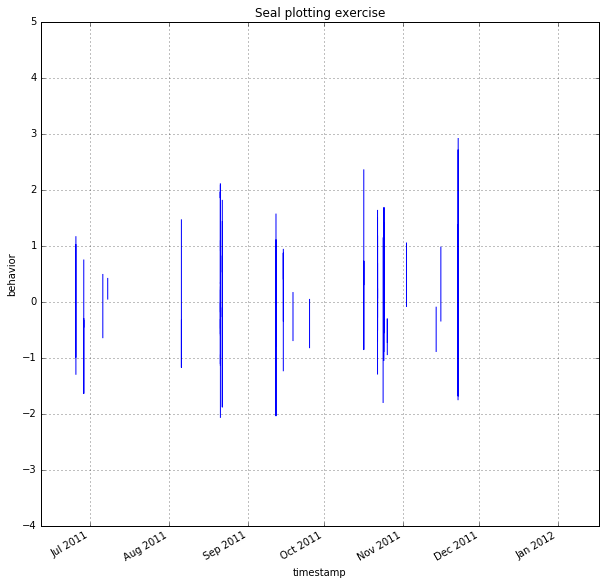

In [51]:
sd[('behavior',"K 11")].plot(figsize=(10, 10))
plt.ylabel('behavior')
plt.title('Seal plotting exercise')
plt.savefig('seal-k11.png')
plt.grid()
plt.show()

### Importing the image into the Markdown

<img src='seal-k11.png'>

# Revisiting the Weather Data Plot

In [52]:
import urllib2
import StringIO 
import itertools 
import datetime

In [53]:
import string

boulder_url  = "http://www.esrl.noaa.gov/psd/boulder/data/boulderdaily.complete"


def cdate(x1, x2, x3):
    try: 
        return datetime.datetime(int(x1), int(x2), int(x3))
    except:
        return datetime.datetime(int(x1), int(x2), int(x3)-1)

df = pd.read_csv(boulder_url, sep=' +', index_col=0, skiprows=1, skipfooter=14, 
                 na_values='-998', engine='python', \
                 parse_dates=[[0,1,2]], date_parser=cdate, \
                 header=None, 
                 names=['year', 'month', 'day', 'tmax', 'tmin', 'precip', 'snow', 'snowcover'],)
df.dtypes

tmax         float64
tmin         float64
precip       float64
snow         float64
snowcover    float64
dtype: object

In [54]:
df.tail(5)

,tmax,tmin,precip,snow,snowcover
year_month_day,,,,,
2015-12-27,27,5,0,0,5
2015-12-28,31,4,0,0,4
2015-12-29,27,9,0,0,3
2015-12-30,30,7,0,0,3
2015-12-31,31,6,0,0,3


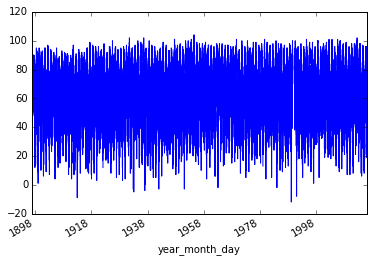

In [55]:
df['tmax'].plot()